In [1]:
#required packages and libraries

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#initialize image data with rescaling:   0<=I(i,j)<=1
train_data_gen = ImageDataGenerator(1./255)
teste_data_gen = ImageDataGenerator(1./255)

#Preprocess all train images 
train_dataGen = train_data_gen.flow_from_directory('data/train', target_size=(48, 48), 
                                                    color_mode='grayscale', class_mode='categorical')
#Preprocess all test images
teste_dataGen = teste_data_gen.flow_from_directory('data/test', target_size=(48, 48), 
                                                    color_mode='grayscale', class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
model_cnn = Sequential()

model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.1))

model_cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.1))

model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.1))


model_cnn.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.1))


model_cnn.add(Flatten())
model_cnn.add(Dense(1024, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(7, activation='softmax'))

################################
model_cnn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_7 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 batch_normalization_8 (Batc  (None, 21, 21, 128)     

In [6]:
model_cnn.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
#train the model 
emotion_model = model_cnn.fit(
                train_dataGen,
                steps_per_epoch = 28709 // 64,
                epochs = 30,
                validation_data = teste_dataGen,
                validation_steps = 7178 // 64)

C:\Users\pc\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
448/448 [==============================] - 167s 368ms/step - loss: 1.8931 - accuracy: 0.2975 - val_loss: 1.5820 - val_accuracy: 0.3856
Epoch 2/30
448/448 [==============================] - 105s 234ms/step - loss: 1.6090 - accuracy: 0.3869 - val_loss: 1.5541 - val_accuracy: 0.3970
Epoch 3/30
448/448 [==============================] - 96s 215ms/step - loss: 1.4778 - accuracy: 0.4334 - val_loss: 1.3635 - val_accuracy: 0.4735
Epoch 4/30
448/448 [==============================] - 107s 238ms/step - loss: 1.4012 - accuracy: 0.4669 - val_loss: 1.3414 - val_accuracy: 0.4863
Epoch 5/30
448/448 [==============================] - 107s 238ms/step - loss: 1.3299 - accuracy: 0.4940 - val_loss: 1.3265 - val_accuracy: 0.4874
Epoch 6/30
448/448 [==============================] - 106s 237ms/step - loss: 1.2778 - accuracy: 0.5149 - val_loss: 1.2556 - val_accuracy: 0.5181
Epoch 7/30
448/448 [==============================] - 106s 236ms/step - loss: 1.2269 - accuracy: 0.5378 - val_loss: 1.2095 - 

In [11]:
train_loss, train_accu = model_cnn.evaluate(train_dataGen)
test_loss, test_accu = model_cnn.evaluate(teste_dataGen)
print(f'testing accuracy is {train_accu*100} train accuracy is {test_accu*100}')

225/225 [==============================] - 10s 46ms/step - loss: 1.3533 - accuracy: 0.6043
testing accuracy is 94.08547878265381 train accuracy is 60.43466329574585


In [15]:
#save model structure to use it after for testing the results's accuracy 
cnn_json = model_cnn.to_json()
with open("data/emotion_json_V3.json", "w") as json_file:
    json_file.write(cnn_json)
json_file.close()
    
#save the updated weights used in our model 
model_cnn.save_weights('data/emotion_weights_V3.5')
    
    
############################################

from keras.models import model_from_json
#the 7 classes:
emotions = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

#load the model from json file that we have already saved 
json_model = open("data/emotion_json_V3.json","r")
loaded_model = json_model.read()
json_model.close()

#retrieve the model:
emotion_model_loaded = model_from_json(loaded_model)
#load the weights 
emotion_model_loaded.load_weights("data/emotion_weights_V3.h5")
# do prediction on test data
predictions = emotion_model_loaded.predict(teste_dataGen)


C:\Users\pc\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[[139   8  91 276 149 194 101]
 [ 14   2  12  27  21  27   8]
 [143  15  92 268 168 206 132]
 [240  21 146 490 260 366 251]
 [181  23 113 358 187 234 137]
 [160  12 108 375 177 267 148]
 [122  10  63 251 138 160  87]]


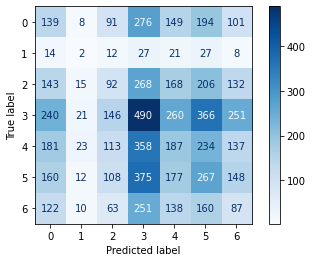

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
c_matrix = confusion_matrix(teste_dataGen.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotions)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()